# Unit 4 Project
After understanding how neural networks work, implementing some basic architectures using deep learning frameworks, and learning about some advanced techniques to help enhance our neural networks' models results, it's time to apply what you learned! So let's start

## Project Overview 
In this project, you will build a neural network model to classify images from CIFAR 10 dataset. 

The CIFAR-10 dataset consists of 60000 32x32 color images of 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. [source](https://www.cs.toronto.edu/~kriz/cifar.html)

Unlike the previous projects, there will be no code cells to fill, the only task you have is to build the best possible model using the techniques you learned about in this unit. But we will guide you with some directives.

You will have enough guidance throughout the project and your work will be reviewed and graded by a teacher assistant. You can also reach out to the TA via slack whenever you feel you are stuck.

## Some guidelines
- Please use text cells to write the questions' answers in a good way.
- Don't forget to save the different models you tested so you will be able to report the different results you got and the impact of the different techniques you tested later.

## Getting started
- In case you don't have a GPU, it is recommended that you use google colab. Start by cloning this repository, then open [google colab](https://colab.research.google.com/), click on File > Upload notebook, and finally upload the ```.ipynb``` file from the repository you have just cloned! Don't forget to change the runtime to GPU. If you want to work in your local environment just open it using jupyter notebook.



## Dataset 

1.   Load the dataset (**hint**: it's available here https://keras.io/api/datasets/)
2.   Display few images of each class.



In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.initializers import HeNormal, GlorotNormal
from tensorflow.keras import regularizers

from tensorflow.keras.optimizers import Adam
import keras
from keras import models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import datetime

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [9]:
x_train, x_test = x_train/255.0, x_test/255.0

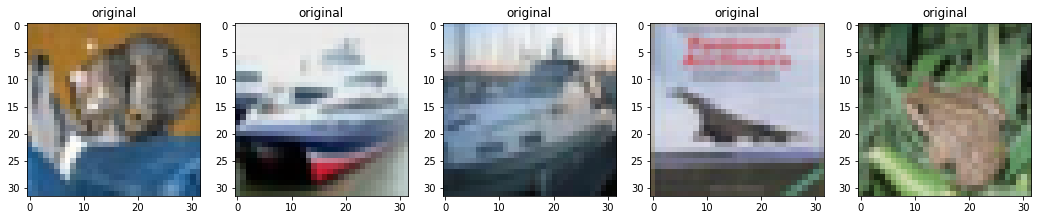

In [3]:
n = 5
plt.figure(figsize=(18,8))
for i in range (n):
    plt.subplot(1,n, i+1)
    
    plt.imshow(x_test[i])
    plt.title('original')

## Baseline Model

1.   Build a basline model using only dense layers, activation function of your choice, and the adapted cost function for this problem.
2.   Train and evaluate your model
3.   Analyze the result



In [10]:
model=Sequential([
    Flatten(),
    Dense(units = 28, activation = 'LeakyReLU', kernel_initializer='he_normal'),
    Dense(units = 32, activation = 'LeakyReLU', kernel_initializer='he_normal'),
    Dense(units = 18, activation = 'LeakyReLU', kernel_initializer='he_normal'),
    Dense(units = 10, activation = 'softmax', kernel_initializer='GlorotNormal')
    
])
    
    
model.compile(loss = SparseCategoricalCrossentropy(), optimizer = Adam(learning_rate = 1e-4), metrics = ['accuracy'])
        
model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0071 - accuracy: 0.2763 - val_loss: 1.8793 - val_accuracy: 0.3354
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8349 - accuracy: 0.3525 - val_loss: 1.7897 - val_accuracy: 0.3705
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7765 - accuracy: 0.3725 - val_loss: 1.7545 - val_accuracy: 0.3796
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7377 - accuracy: 0.3868 - val_loss: 1.7405 - val_accuracy: 0.3812
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7072 - accuracy: 0.4024 - val_loss: 1.6971 - val_accuracy: 0.4010
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6836 - accuracy: 0.4070 - val_loss: 1.6810 - val_accuracy: 0.4027
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6615 - accuracy: 0.4151 - val_loss: 1.6538 - val_accuracy:

## Accelerating the training

1.   Add batch normalization layers to your network in order to accelerate the training. Start with adding batch norm layer before each of your activation layers.
2.   Analyze the new results
3.   Change the position of the batch norm layers so they will be after the activation layers. Compare the results.
   



In [11]:
model=Sequential([
    Flatten(input_shape=((32,32,3))),
    Dense(units = 28, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dense(units = 32, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dense(units = 18, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dense(units = 10, activation = 'softmax', kernel_initializer='GlorotNormal')
    
])
    
    
    
model.compile(loss = SparseCategoricalCrossentropy(), optimizer = Adam(learning_rate = 1e-4), metrics = ['accuracy'])
        
model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9382 - accuracy: 0.3127 - val_loss: 1.8141 - val_accuracy: 0.3579
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7723 - accuracy: 0.3772 - val_loss: 1.7444 - val_accuracy: 0.3808
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7186 - accuracy: 0.3963 - val_loss: 1.6808 - val_accuracy: 0.4093
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6798 - accuracy: 0.4093 - val_loss: 1.7071 - val_accuracy: 0.4028
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6506 - accuracy: 0.4193 - val_loss: 1.7058 - val_accuracy: 0.3969
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6276 - accuracy: 0.4270 - val_loss: 1.6624 - val_accuracy: 0.4118
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6098 - accuracy: 0.4353 - val_loss: 1.6977 - val_accuracy:

## Reducing the overfitting 


1.   Apply the dropout technique to reduce the overfitting your model is suffering from
2.   Try different dropout rates 



In [12]:
model=Sequential([
    Flatten(input_shape=((32,32,3))),
    Dense(units = 32, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dense(units = 64, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dense(units = 128, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dense(units = 64, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dense(units = 32, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dropout(0.3),
    Dense(units = 10, activation = 'softmax', kernel_initializer='GlorotNormal')
    
])
    
    
    
model.compile(loss = SparseCategoricalCrossentropy(), optimizer = Adam(learning_rate = 1e-4), metrics = ['accuracy'])
        
model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1794 - accuracy: 0.2547 - val_loss: 1.7999 - val_accuracy: 0.3559
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8966 - accuracy: 0.3331 - val_loss: 1.7539 - val_accuracy: 0.3664
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8033 - accuracy: 0.3640 - val_loss: 1.8356 - val_accuracy: 0.3630
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7384 - accuracy: 0.3831 - val_loss: 1.6402 - val_accuracy: 0.4192
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6914 - accuracy: 0.4009 - val_loss: 1.7415 - val_accuracy: 0.3933
Epoch 6/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.6487 - accuracy: 0.4158 - val_loss: 1.5582 - val_accuracy: 0.4489
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6221 - accuracy: 0.4255 - val_loss: 1.5449 - val_accuracy:

## Trying different model's parameters
1. Try changing the number of layers, the number of hidden neurons in each layer, the activation functions, the weight initialization method...
2. Compare the results you got for each evaluated model.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

early_stopping.monitor='val_loss'
early_stopping.patience = 2

In [14]:
model=Sequential([
    Flatten(input_shape=((32,32,3))),
    Dense(units = 32, batch_size= 28, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dense(units = 64, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dense(units = 128, activation = 'LeakyReLU', kernel_initializer='he_normal', kernel_regularizer= regularizers.l1_l2(0.001)), BatchNormalization(),
    Dense(units = 64, activation = 'LeakyReLU', kernel_initializer='he_normal',kernel_regularizer= regularizers.l1_l2(0.001)), BatchNormalization(),
    Dense(units = 32, activation = 'LeakyReLU', kernel_initializer='he_normal'), BatchNormalization(),
    Dense(units = 10, activation = 'softmax', kernel_initializer='GlorotNormal')    
])
    
    
    
model.compile(loss = SparseCategoricalCrossentropy(), optimizer = Adam(learning_rate = 1e-4), metrics = ['accuracy'])
        
model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 20, verbose=1, callbacks=[early_stopping])


Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 6.8277 - accuracy: 0.3231 - val_loss: 5.6970 - val_accuracy: 0.3636
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 4.9120 - accuracy: 0.3939 - val_loss: 4.2837 - val_accuracy: 0.4006
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 3.8052 - accuracy: 0.4180 - val_loss: 3.4379 - val_accuracy: 0.4206
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 3.1486 - accuracy: 0.4293 - val_loss: 2.9346 - val_accuracy: 0.4235
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.7204 - accuracy: 0.4445 - val_loss: 2.6280 - val_accuracy: 0.4322
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.4389 - accuracy: 0.4565 - val_loss: 2.3317 - val_accuracy: 0.4599
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2370 - accuracy: 0.4661 - val_loss: 2.1850 - val_accuracy:

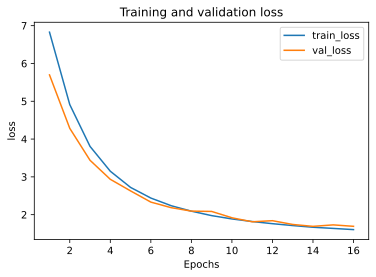

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(model_history, 'loss')

## Few more experiments to go

1.   **Exploring more regularization techniques:** Try at least 2 regularization techniques separately and combined.  A non-exhaustive list of regularization techniques you can test


> * L1 and L2 regularization
* Early stopping
* Data augmentation
* Decreasing the complexity of the model

2.   **Hyperparameters' tuning:** Try to tune the learning parameters using the tuning strategies we learned about:

> * Learning rate
* Mini-batch size
* The optimizer and its parameters

3. Analyze the impact of each of the applied techniques. What were the most effective ones? What were the hypeparameters that affects the results the most?


In [ ]:
# Your code here

## Answer the following questions
*Hint: Do your own research to answer these questions, none of the questions is answered in the previous lessons*


1.   Why we can’t reach a good accuracy on this task?
2.   Explain why fully connected neural networks are Not efficient on image tasks
3.   What architecture can be used  for such tasks? Why they are more adapted for that?

\

In [ ]:
# 2. One of the main problems is that spatial information is lost when the image is flattened into an MLP.
# 3. CNN's